In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# add base data path
data_path = os.getcwd() + "/results/"

# add single dataset
df_names = [
    "alberta-based-v2",
    "bert-base-uncased",
    "bert-large-uncased",
    "gemma",
    "llama",
    "roberta-base",
    "roberta-large"
]

# Use a dictionary comprehension to load all datasets
df_list = {name: pd.read_csv(f"{data_path}{name}.csv") for name in df_names}


### Visualization

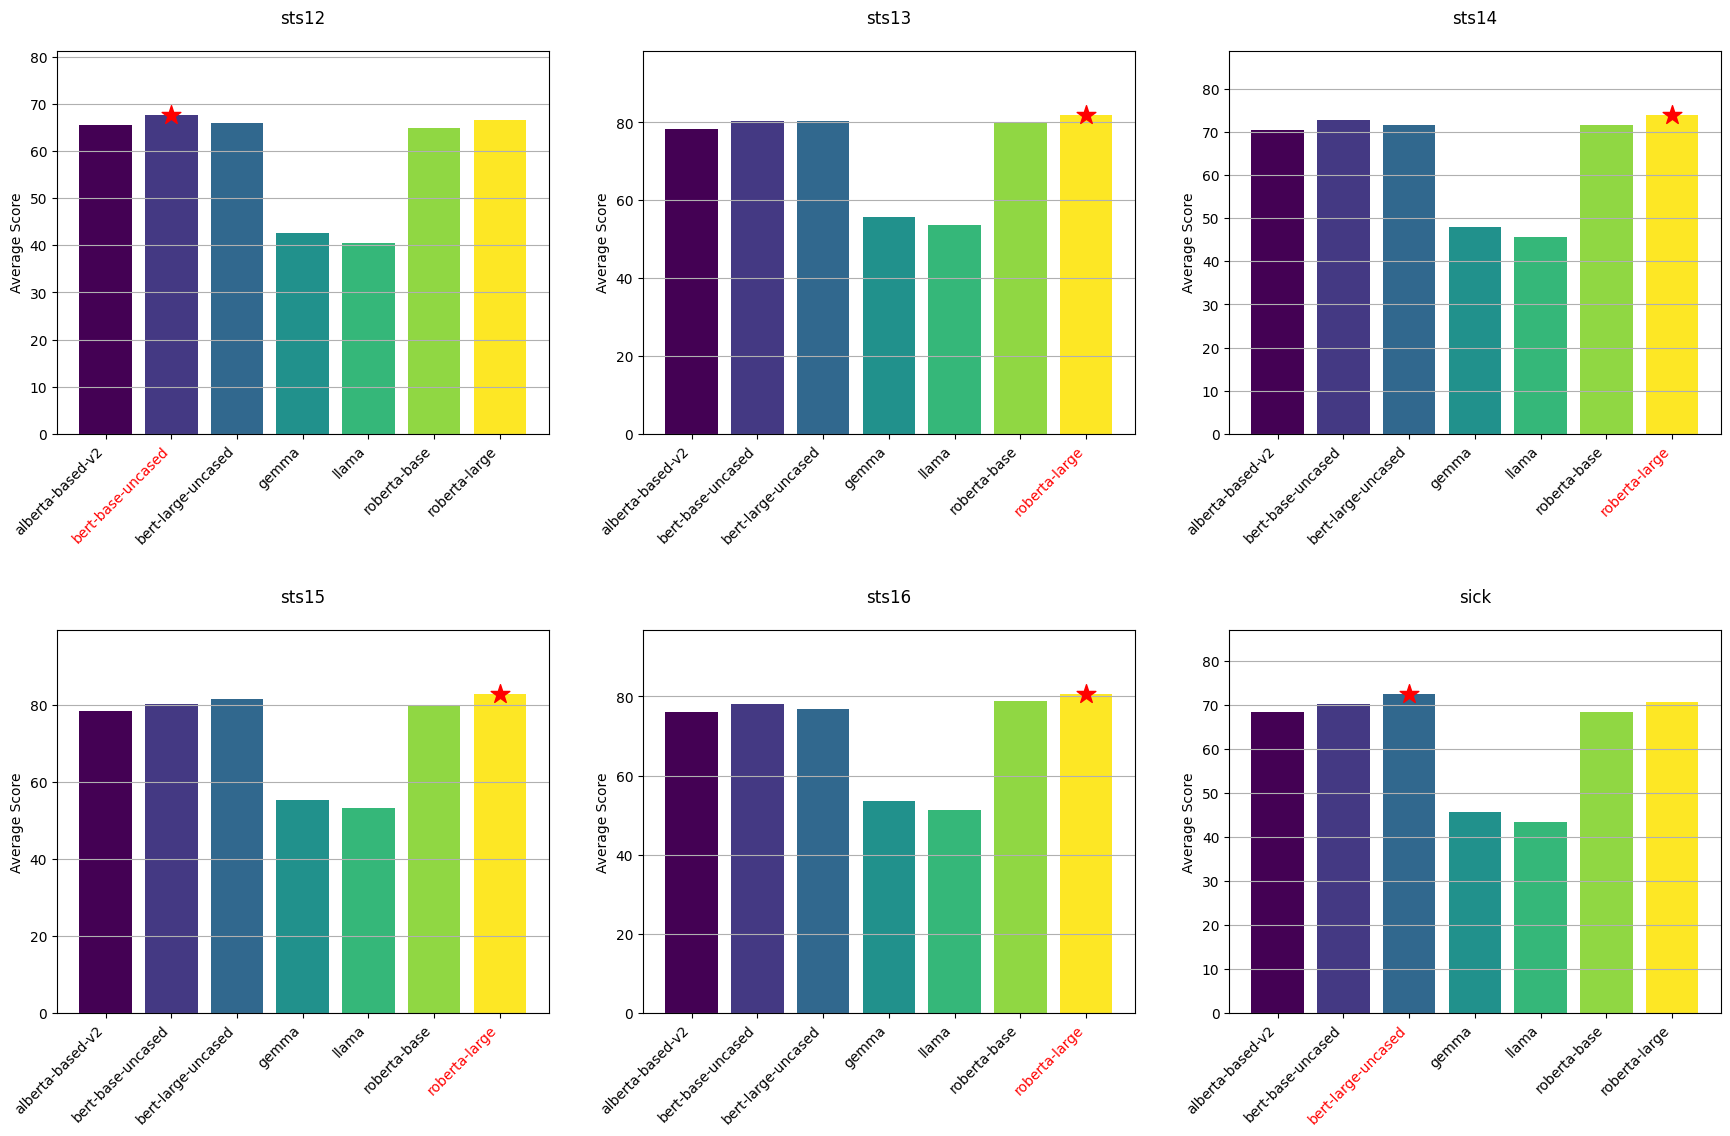

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the tasks to plot
tasks = ['sts12', 'sts13', 'sts14', 'sts15', 'sts16', 'sick']
n_tasks = len(tasks)

# Set up the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, task in enumerate(tasks):
    # Calculate the mean score for each model on the task
    scores = [df[task].mean() for df in df_list.values()]
    
    # Identify the highest score and its index for placing the star and changing tick color
    highest_score = max(scores)
    highest_index = scores.index(highest_score)
    
    # Plot the bars in the current subplot
    bars = axes[i].bar(df_names, scores, color=plt.cm.viridis(np.linspace(0, 1, len(df_names))))
    axes[i].set_title(f'{task}', pad=20)
    axes[i].set_ylabel('Average Score')
    
    # Rotate x-axis tick labels and set the color of the highest bar's label to red
    axes[i].set_xticks(range(len(df_names)))
    axes[i].set_xticklabels(df_names, rotation=45, ha="right")
    for label in axes[i].get_xticklabels():
        label.set_color('black')  # Reset colors
    axes[i].get_xticklabels()[highest_index].set_color('red')  # Set the color of the highest bar's label to red
    
    axes[i].grid(axis='y')
    
    # Add a red star at the highest bar
    axes[i].scatter(highest_index, highest_score, color='red', s=200, marker='*', zorder=5)
    
    # Adjust ylim to add more white space on the top
    axes[i].set_ylim(0, highest_score * 1.2)
    
# Adjust the layout to prevent overlap and ensure clarity
plt.tight_layout(pad=3.0)
plt.show()
